# Total Gradient Amplitude (TGA)

### This notebook ilustrate how to calculate the Total Gradient Amplitude (TGA).

### Let $\mathcal{F}\left[\mathcal{P}(x,y)\right]$ be the transformed potential data, which can be written as:

# $$\mathcal{F}\left[\mathcal{P}(x,y)\right] = \int \mathcal{P}(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

### The TGA is calculated by:
# $$TGA(x,y,z) = \sqrt{\left(\dfrac{\partial \mathcal{P}}{\partial x}\right)^2
+ \left(\dfrac{\partial \mathcal{P}}{\partial y}\right)^2
+ \left(\dfrac{\partial \mathcal{P}}{\partial z}\right)^2}$$

### where $\partial_x \mathcal{P}$ and $\partial_y \mathcal{P}$ are the horizontal derivatives and $\partial_z \mathcal{P}$ is thee vertical derivative. (See notebook "Derivatives").

In [1]:
# Copying all usefull libraries
import numpy as np
import gravmag as gmc
import datafiltering as df
import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic Magnetic data

In [2]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-3000., 3000., npts)
y = np.copy(x)
z = -100.
# Creat the grid file
X, Y = np.meshgrid(x, y)

In [3]:
#Informations about the rectangular prisms that we will use
prism = [-500., 500., -500., 500., 10., 1010., -1.5]

# Informations about the values for inclination and declination
direc = [-40., -35.]

In [4]:
# Calculate the total field anomaly
tf = gmc.prism_tf(X, Y, z, prism, direc, direc)

In [5]:
# Computes the total gradient by using the numerical derivatives
# Calculating the numerical derivative
delta = 10.
# In X
xi = gmc.prism_tf(X - delta, Y, z, prism, direc, direc)
xf = gmc.prism_tf(X + delta, Y, z, prism, direc, direc)
diffx = (xf - xi)/(2.*delta)
# In Y
yi = gmc.prism_tf(X, Y - delta, z, prism, direc, direc)
yf = gmc.prism_tf(X, Y + delta, z, prism, direc, direc)
diffy = (yf - yi)/(2.*delta)
# In X
zi = gmc.prism_tf(X, Y, z - 0.1*delta, prism, direc, direc)
zf = gmc.prism_tf(X, Y, z + 0.1*delta, prism, direc, direc)
diffz = (zf - zi)/(2.*0.1*delta)
# Total gradient
tga_calc = (diffx**2 + diffy**2 + diffz**2)**(0.5)

In [6]:
# Computes the total gradient by using the calculated derivatives
tga = df.totalgrad(x, y, tf)

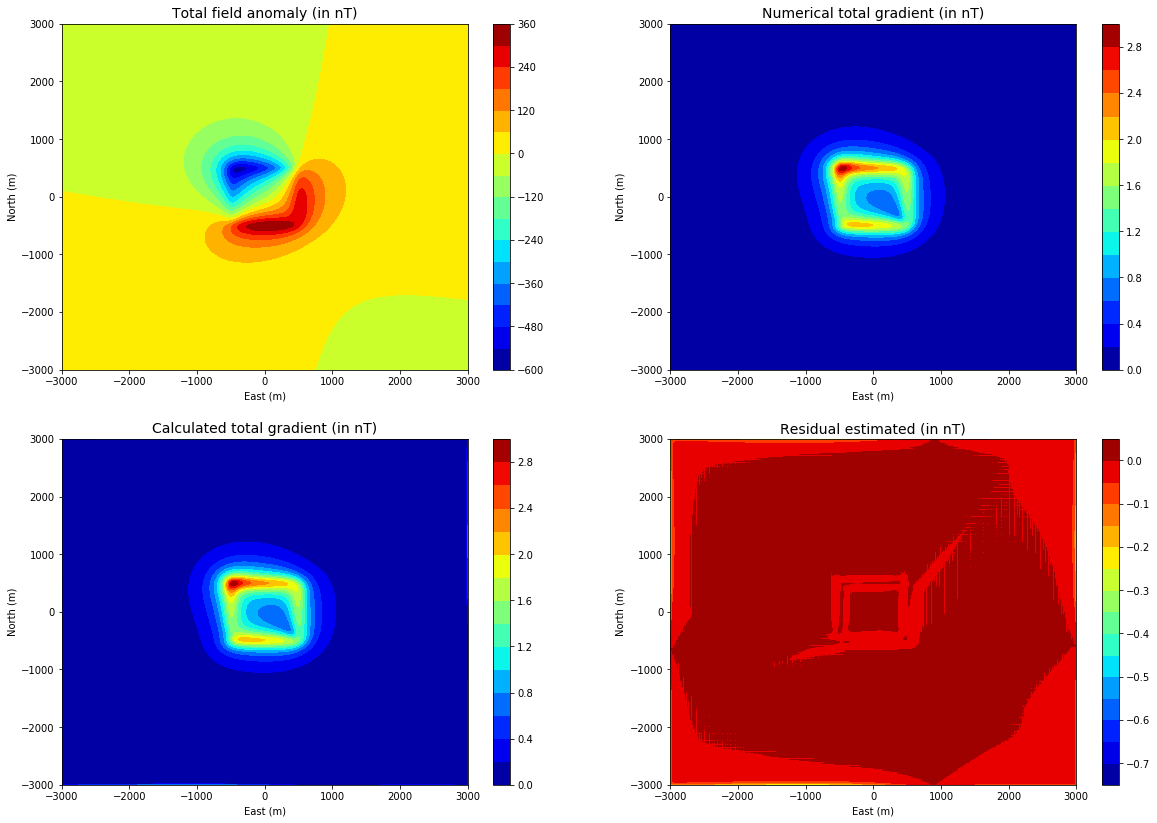

In [7]:
# Plotting the total field anomaly and the total gradient
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
plt.title('Total field anomaly (in nT)', fontsize = 14)
plt.contourf(Y, X, tf, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Numerical total gradient (in nT)', fontsize = 14)
plt.contourf(Y, X, tga_calc, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Calculated total gradient (in nT)', fontsize = 14)
plt.contourf(Y, X, tga, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Residual estimated (in nT)', fontsize = 14)
plt.contourf(Y, X, tga_calc - tga, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()